# Table of Contents <a id = 'scrollTo=8ZHYR1PYhOvg'></a>

>[Table of Contents](#scrollTo=8ZHYR1PYhOvg)

>>>[Import Packages](#scrollTo=6bPDSyZmoGl4)

>>[Introduction](#scrollTo=WJAjUmtVDPhy)

>>>[Background](#scrollTo=aauUjn_GmrdC)

>>>[Requirements](#scrollTo=5NkkGqwaYqQM)

>>>[Import Data](#scrollTo=f6iVCKMtoAAw)

>>>[Date type coversion](#scrollTo=wdZW3n2bPhd-)

>>[Description of Entire Data](#scrollTo=pxXfLW4JCXBK)

>>>[Metadata](#scrollTo=GNt7txExmpTC)

>>[Handling Missing data](#scrollTo=OhDlj7AwCmyS)

>>[Exploratory visualizations and/or summary tables](#scrollTo=hkyshRt6DTdq)

>>>[Execution Time Pattern](#scrollTo=5184nso0lkFT)

>>>[Production Location (Plant) Distribution](#scrollTo=denH1qpmdnQH)

>>>[Actual work time in minutes](#scrollTo=vS__isyWeJGi)

>>>[Maintainance Activity Type (Planned vs Unplanned)](#scrollTo=uqX0V4kyf3sq)

>>>[Fuctional Location Code Frequency](#scrollTo=hAPRIj8olJC8)

>>>[Machine (Functional area node #4) distribution](#scrollTo=agdhjgah)

>>>[Unplanned maintenance orders](#scrollTo=R3gHY1NngEl7)

>>>[Order Description](#scrollTo=piKhHRxmo5Qq)

>>[Summary](#scrollTo=uEltcAiqmOmB)

>>[Group Member Contribution](#scrollTo=gmc)

### Import Packages <a id = 'scrollTo=6bPDSyZmoGl4'></a>

In [190]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.colors as mcolors
from wordcloud import WordCloud
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Introduction <a id = 'scrollTo=WJAjUmtVDPhy'></a>

### Background <a id = 'scrollTo=aauUjn_GmrdC'></a>
**State the project goal and summarize the business and analytic problems.**

In Swire Coca-Cola's production processes, manufacturing machines occasionally face unexpected mechanical breakdowns, leading to nearly $60 million in annual losses.

By analyzing the downtimes recorded in the Internal Warehouse Controller (IWC), we aim to understand the severity of these downtimes across different plants, identify the factors causing the breakdowns, and explore preventive methods to reduce the associated opportunity costs.

### Requirements <a id = 'scrollTo=5NkkGqwaYqQM'></a>
**State the purpose of the EDA notebook and the questions about the data that you will be exploring.**

EDA notebook aim to identify the main reasons and answer the following questions.

- Are there any time-related patterns in maintenance issues over the given time period?
- How long does maintenance time take per each plant (production location) in average?
- What is the average and median maintenance time to resolve issues, and how much longer do unplanned issues take compared to planned ones?
- Which plant has the most frequent maintenance issues, and what factors contribute to this?
- Which component/part is most vulnerable within the manufacurting process?

### Import Data <a id = 'scrollTo=f6iVCKMtoAAw'></a>

In [109]:
# Import data
df = pd.read_csv('IWC_Work_Orders_Extract.csv')

### Date type coversion <a id = 'scrollTo=wdZW3n2bPhd-'></a>

In [110]:
# Convert numeric data to date type data
df['EXECUTION_START_DATE'] = pd.to_datetime(df['EXECUTION_START_DATE'])
df['EXECUTION_FINISH_DATE'] = pd.to_datetime(df['EXECUTION_FINISH_DATE'])
df['EQUIP_START_UP_DATE'] = pd.to_datetime(df['EQUIP_START_UP_DATE'])
df['EQUIP_VALID_FROM'] = pd.to_datetime(df['EQUIP_VALID_FROM'])

In [112]:
# Calculate "before functional duration": the time when the machine was acquired to the time when it became functional
df['B_FUNCTIONAL_DURATION'] =  df['EQUIP_VALID_FROM'] - df['EQUIP_START_UP_DATE']

In [113]:
df.sample(30)

,ORDER_ID,PLANT_ID,PRODUCTION_LOCATION,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_PLAN,MAINTENANCE_ITEM,MAINTENANCE_ACTIVITY_TYPE,ORDER_DESCRIPTION,MAINTENANCE_TYPE_DESCRIPTION,FUNCTIONAL_LOC,FUNCTIONAL_AREA_NODE_1_MODIFIED,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_ID,EQUIPMENT_DESC,EQUIP_CAT_DESC,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO,B_FUNCTIONAL_DURATION
1244918,704403603,G261,SILVERSTONE,2023-01-05,2023-01-05,07:00:00.000,07:00:00.000,66.0,G261TR1267,113244.0,Planned,WEEKLY PM AGV #1 WEEKLY PM AGV #1,Preventive Maintenance Order,G261-PRD-L45,SILVERSTONE PRODUCTION,COMMON EQUIPMENT,NaN,NaN,NaN,300019086.0,NaN,NaN,NaT,NaT,NaN,NaT
1288552,704624901,G221,SUZUKA,2023-04-20,2023-04-20,07:00:00.000,07:00:00.000,30.0,G221VJ1026,90373.0,Planned,PUMP HFCS #1 FOR MECH WHILE OPERATING,Preventive Maintenance Order,G221-PRD-P80-S02,SUZUKA PRODUCTION,SYRUP/BLENDING ROOM,SYRYUP BULK INGREDIENTS,NaN,NaN,300009645.0,NaN,NaN,NaT,NaT,NaN,NaT
16722,170000479859,G261,SILVERSTONE,2018-10-29,2018-10-29,18:54:00.000,18:54:00.000,0.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT
309591,900617367,G261,SILVERSTONE,2019-01-24,2019-01-24,21:56:00.000,21:56:00.000,0.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT
100684,1000411093,G812,ROMA,2018-11-10,2018-11-10,00:00:00.000,00:00:00.000,0.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT
1052241,1000293999,G812,ROMA,2018-07-18,2018-07-18,00:00:00.000,00:00:00.000,0.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT
833895,600205765,G221,SUZUKA,2017-06-12,2017-06-14,15:03:04.000,22:18:49.000,110.4,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT
1609,703797826,G816,COTA,2022-06-02,2022-06-02,06:00:00.000,06:00:00.000,60.0,NaN,NaN,Unplanned,VALVE #5 #51 REPLACED,Corrective Maintenance Order,G816-PRD-L15-L01-L080,COTA PRODUCTION,CAN LINE,LINE #1-CAN_LINE,FILLER,NaN,300115000.0,L1 FILLER_ROTARY_CAN_72_VALVE,Machines,2019-10-10,2019-10-06,9999-12-31,-4 days
916973,200003964124,G291,MONZA,2023-12-05,2024-01-04,17:01:00.000,22:25:00.000,252.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT
892194,200002713364,G221,SUZUKA,2021-08-28,2021-08-28,00:10:00.000,00:44:00.000,34.0,NaN,NaN,Unplanned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaT


In [114]:
# Functional location code split
df['FUCTIONAL_LOC_SPLIT'] = df['FUNCTIONAL_LOC'].str.split('-')

## Description of Entire Data <a id = 'scrollTo=pxXfLW4JCXBK'></a>

### Metadata <a id = 'scrollTo=GNt7txExmpTC'></a>

In [115]:
# Columns name
df.columns

Index(['ORDER_ID', 'PLANT_ID', 'PRODUCTION_LOCATION', 'EXECUTION_START_DATE',
       'EXECUTION_FINISH_DATE', 'ACTUAL_START_TIME', 'ACTUAL_FINISH_TIME',
       'ACTUAL_WORK_IN_MINUTES', 'MAINTENANCE_PLAN', 'MAINTENANCE_ITEM',
       'MAINTENANCE_ACTIVITY_TYPE', 'ORDER_DESCRIPTION',
       'MAINTENANCE_TYPE_DESCRIPTION', 'FUNCTIONAL_LOC',
       'FUNCTIONAL_AREA_NODE_1_MODIFIED', 'FUNCTIONAL_AREA_NODE_2_MODIFIED',
       'FUNCTIONAL_AREA_NODE_3_MODIFIED', 'FUNCTIONAL_AREA_NODE_4_MODIFIED',
       'FUNCTIONAL_AREA_NODE_5_MODIFIED', 'EQUIPMENT_ID', 'EQUIPMENT_DESC',
       'EQUIP_CAT_DESC', 'EQUIP_START_UP_DATE', 'EQUIP_VALID_FROM',
       'EQUIP_VALID_TO', 'B_FUNCTIONAL_DURATION', 'FUCTIONAL_LOC_SPLIT'],
      dtype='object')

| Column Name | Definition |
|---|---|
| ORDER_ID| An identifier used to uniquely map every order raised in IWC|
|PLANT_ID|Helps uniquely identify all factories of Swire Coca-Cola, between Monza, Cota, Silverstone, Monaco, Roma and Suzuka|
|PRODUCTION_LOCATION| Text description of Plant_ID |
|EXECUTION_START_DATE|The date on which work began on the said issue|
|EXECUTION_FINISH_DATE|The date on which work ended to resolve said issue|
|ACTUAL_START_TIME|The time at which work began on resolving said issue|
|ACTUAL_FINISH_TIME|The time at which work ended on resolving said issue|
|ACTUAL_WORK_IN_MINUTES|The time it took, in minutes, to resolve said issue|
|MAINTENANCE_PLAN|If the maintenance task was planned, this would have the plan ID. If this column is null, that implies that the maintenance was unplanned|
|MAINTENANCE_ITEM|If the maintenance task was planned, for example, this bearing needs to be changed every six weeks, then the plan in the IWC system will have code allocated to it, saying this bearing code  a maintenance will repeat at X interval and the serial number you see in this column maps to bearings (Mapping not provided for security reasons)|
|MAINTENANCE_ACTIVITY_TYPE|Lets you know if the maintenance was planned or unplanned, as an additional flag|
|ORDER_DESCRIPTION|The description entered by the mechanic as to what was the actual work that was carried out in said fix|
|MAINTENANCE_TYPE_DESCRIPTION|Tells you if the work order was preventive in nature, i.e. done to prevent breakdowns in future, or corrective in nature, i.e. done to correct something that caused a downtime|
|FUNCTIONAL_LOC|Works like an IP address. Helps locate each machine by plant – process – sub process – product line – machine. Is broken down into nodes for better analysis|
|FUNCTIONAL_AREA_NODE_1_MODIFIED|The functional area within said plant – Production, fleet, HVAC, etc.|
|FUNCTIONAL_AREA_NODE_2_MODIFIED|The region-based subset of the functional area – Is it the blender room, the assembly lines – can, bottle or bibs|
|FUNCTIONAL_AREA_NODE_3_MODIFIED|Within each region, which subset of equipment does this work order belong to|
|FUNCTIONAL_AREA_NODE_4_MODIFIED|Within line groupings, which line is it specifically referring to – contains line number|
|FUNCTIONAL_AREA_NODE_5_MODIFIED|Further splits the line into individual machine types|
|EQUIPMENT_ID|Within a filler, there are close to 60 smaller components. This will help us identify which component the work was done on within that filler, for example|
|EQUIPMENT_DESC5|Helps us identify what that component is. Mind you, we won’t always have a description because some components are either too small to be classified or proprietary and hence undisclosed|
|EQUIPMENT_CAT_DESC|Identifies if the fixed part was on a machine, a vehicle, an HVAC system, etc.|
|EQUIP_START_UP_DATE|The date on which this machine was acquired|
|EQUIP_VALID_FROM|The date on which this machine became functional|
|EQUIP_VALID_TO|The date until which this machine shall be used|





In [116]:
# Rows & Columns Number
df.shape

(1427264, 27)

We have around 1.4 millions of rows and 27 columns to analyze the data.

In [117]:
# Descriptive statistics
df.describe()

,ORDER_ID,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_ITEM,EQUIPMENT_ID,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,B_FUNCTIONAL_DURATION
count,1.427264e+06,1427264,1427264,1.427264e+06,152594.000000,2.917950e+05,79447,79447,79447
mean,4.561470e+10,2020-12-20 22:30:26.756647424,2020-12-21 15:53:00.772163072,8.862968e+01,115846.807954,3.002609e+08,2017-06-19 05:01:35.203091968,2019-03-03 16:01:09.963622912,622 days 10:59:34.760532176
min,1.000219e+08,2013-08-19 00:00:00,2016-07-25 00:00:00,0.000000e+00,39801.000000,2.000871e+08,1960-01-01 00:00:00,2017-02-15 00:00:00,-446 days +00:00:00
25%,4.022602e+08,2019-02-09 00:00:00,2019-02-11 00:00:00,1.200000e+01,41046.000000,3.000092e+08,2017-02-15 00:00:00,2017-02-15 00:00:00,0 days 00:00:00
50%,7.044271e+08,2020-12-09 00:00:00,2020-12-10 00:00:00,4.800000e+01,112995.000000,3.000178e+08,2017-02-15 00:00:00,2017-03-15 00:00:00,0 days 00:00:00
75%,1.002343e+09,2022-12-07 00:00:00,2022-12-08 00:00:00,9.000000e+01,134702.000000,3.000269e+08,2018-05-07 00:00:00,2020-08-11 00:00:00,151 days 00:00:00
max,9.000001e+11,2024-08-30 00:00:00,2024-08-30 00:00:00,3.301848e+05,346352.000000,4.000290e+08,2024-05-16 00:00:00,2024-05-20 00:00:00,23092 days 00:00:00
std,8.387114e+10,NaN,NaN,8.037915e+02,71325.255687,5.581645e+06,NaN,NaN,1642 days 09:27:04.304119840


In [118]:
# Categorical data descriptive statistics
df.select_dtypes(include='object').describe()

,PLANT_ID,PRODUCTION_LOCATION,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,MAINTENANCE_PLAN,MAINTENANCE_ACTIVITY_TYPE,ORDER_DESCRIPTION,MAINTENANCE_TYPE_DESCRIPTION,FUNCTIONAL_LOC,FUNCTIONAL_AREA_NODE_1_MODIFIED,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_DESC,EQUIP_CAT_DESC,EQUIP_VALID_TO,FUCTIONAL_LOC_SPLIT
count,1427264,1427264,1427264,1427264,152594,1427264,291767,291795,291782,290117,282407,258691,237573,2180,79447,79447,79447,291782
unique,6,6,65927,61388,3308,2,118925,5,667,7,67,141,86,36,807,4,1,667
top,G261,SILVERSTONE,00:00:00.000,00:00:00.000,000000022943,Unplanned,DTRINE,Preventive Maintenance Order,G812-PRD,COTA PRODUCTION,CAN LINE,LINE #4-FILLER_ROTARY_CAN,FILLER,FULL CAN TO ACCUMULATION TABLE,L1 FILLER_ROTARY_CAN_72_VALVE,Machines,9999-12-31,"[G812, PRD]"
freq,630903,630903,212155,202920,1327,1276877,2012,151533,5923,70187,34208,35834,46322,251,3745,79224,79447,5923


In [119]:
# Numerical data descriptive statistics
df.select_dtypes(include='number').describe()

,ORDER_ID,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_ITEM,EQUIPMENT_ID,B_FUNCTIONAL_DURATION
count,1.427264e+06,1.427264e+06,152594.000000,2.917950e+05,79447
mean,4.561470e+10,8.862968e+01,115846.807954,3.002609e+08,622 days 10:59:34.760532176
std,8.387114e+10,8.037915e+02,71325.255687,5.581645e+06,1642 days 09:27:04.304119840
min,1.000219e+08,0.000000e+00,39801.000000,2.000871e+08,-446 days +00:00:00
25%,4.022602e+08,1.200000e+01,41046.000000,3.000092e+08,0 days 00:00:00
50%,7.044271e+08,4.800000e+01,112995.000000,3.000178e+08,0 days 00:00:00
75%,1.002343e+09,9.000000e+01,134702.000000,3.000269e+08,151 days 00:00:00
max,9.000001e+11,3.301848e+05,346352.000000,4.000290e+08,23092 days 00:00:00


The column B_FUNCTIONAL_DURATION measures the time between when a machine was acquired (EQUIP_START_UP_DATE) and when it became functional (EQUIP_VALID_FROM). Negative values in this column, such as -446 days, indicate that the machine is marked as functional before it was acquired, which is logically incorrect.

## Handling Missing data <a id = 'scrollTo=OhDlj7AwCmyS'></a>

In [120]:
# Missing data numbers per variable
df.isnull().sum().sort_values(ascending=False)

FUNCTIONAL_AREA_NODE_5_MODIFIED    1425084
B_FUNCTIONAL_DURATION              1347817
EQUIP_VALID_TO                     1347817
EQUIP_VALID_FROM                   1347817
EQUIP_START_UP_DATE                1347817
EQUIP_CAT_DESC                     1347817
EQUIPMENT_DESC                     1347817
MAINTENANCE_PLAN                   1274670
MAINTENANCE_ITEM                   1274670
FUNCTIONAL_AREA_NODE_4_MODIFIED    1189691
FUNCTIONAL_AREA_NODE_3_MODIFIED    1168573
FUNCTIONAL_AREA_NODE_2_MODIFIED    1144857
FUNCTIONAL_AREA_NODE_1_MODIFIED    1137147
ORDER_DESCRIPTION                  1135497
FUNCTIONAL_LOC                     1135482
FUCTIONAL_LOC_SPLIT                1135482
MAINTENANCE_TYPE_DESCRIPTION       1135469
EQUIPMENT_ID                       1135469
PLANT_ID                                 0
MAINTENANCE_ACTIVITY_TYPE                0
ACTUAL_WORK_IN_MINUTES                   0
ACTUAL_FINISH_TIME                       0
ACTUAL_START_TIME                        0
EXECUTION_F

In [121]:
# Missing data proportion per variable
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

FUNCTIONAL_AREA_NODE_5_MODIFIED    99.847260
B_FUNCTIONAL_DURATION              94.433616
EQUIP_VALID_TO                     94.433616
EQUIP_VALID_FROM                   94.433616
EQUIP_START_UP_DATE                94.433616
EQUIP_CAT_DESC                     94.433616
EQUIPMENT_DESC                     94.433616
MAINTENANCE_PLAN                   89.308635
MAINTENANCE_ITEM                   89.308635
FUNCTIONAL_AREA_NODE_4_MODIFIED    83.354656
FUNCTIONAL_AREA_NODE_3_MODIFIED    81.875042
FUNCTIONAL_AREA_NODE_2_MODIFIED    80.213401
FUNCTIONAL_AREA_NODE_1_MODIFIED    79.673207
ORDER_DESCRIPTION                  79.557601
FUNCTIONAL_LOC                     79.556550
FUCTIONAL_LOC_SPLIT                79.556550
MAINTENANCE_TYPE_DESCRIPTION       79.555639
EQUIPMENT_ID                       79.555639
PLANT_ID                            0.000000
MAINTENANCE_ACTIVITY_TYPE           0.000000
ACTUAL_WORK_IN_MINUTES              0.000000
ACTUAL_FINISH_TIME                  0.000000
ACTUAL_STA

Only 20% of the issues recorded in the IWC include detailed information partially, such as location codes, node informed data, and required equipment.

If 20% data shows a clear pattern that helps identify the root cause of the problems, the findings could potentially be applied to the remaining, unknown issues either.

In [122]:
# Calculate the median date
median_start_up_date = df['EQUIP_START_UP_DATE'].median()

# Define a function to adjust the startup date to ensure it's before the valid from date
def adjust_start_up_date(row):
    if pd.isnull(row['EQUIP_START_UP_DATE']):
        # Impute the startup date
        imputed_start_up_date = median_start_up_date
        
        # Check if the imputed startup date is after the valid from date
        if not pd.isnull(row['EQUIP_VALID_FROM']) and imputed_start_up_date >= row['EQUIP_VALID_FROM']:
            # Set the startup date to one day before the valid from date to maintain chronology
            return row['EQUIP_VALID_FROM'] - pd.Timedelta(days=1)
        else:
            return imputed_start_up_date
    else:
        return row['EQUIP_START_UP_DATE']

# Apply the function to handle missing values in EQUIP_START_UP_DATE
df['EQUIP_START_UP_DATE'] = df.apply(adjust_start_up_date, axis=1)

# Verify if missing values are handled
print(df['EQUIP_START_UP_DATE'].isnull().sum())

0


The imputation was necessary to maintain the chronological integrity of the dataset, ensuring that the EQUIP_START_UP_DATE always precedes the EQUIP_VALID_FROM date. This avoids logical inconsistencies, such as equipment being operational before its acquisition. 

## Exploratory visualizations and/or summary tables <a id = 'scrollTo=hkyshRt6DTdq'></a>

### Execution Time Pattern <a id = 'scrollTo=5184nso0lkFT'></a>

In [123]:
# Yearly distribution
df['EXECUTION_START_DATE'].dt.year.value_counts().sort_index()

EXECUTION_START_DATE
2013         1
2016     20925
2017    118305
2018    194641
2019    203767
2020    185807
2021    182353
2022    176190
2023    200874
2024    144401
Name: count, dtype: int64

In [124]:
df.groupby(df['EXECUTION_START_DATE'].dt.year)['EXECUTION_START_DATE'].agg(min_exec_date='min', max_exec_date='max')

,min_exec_date,max_exec_date
EXECUTION_START_DATE,,
2013,2013-08-19,2013-08-19
2016,2016-07-25,2016-12-31
2017,2017-01-01,2017-12-31
2018,2018-01-01,2018-12-31
2019,2019-01-01,2019-12-31
2020,2020-01-01,2020-12-31
2021,2021-01-01,2021-12-31
2022,2022-01-01,2022-12-31
2023,2023-01-01,2023-12-31


Text(0, 0.5, 'Number of Maintenance Cases')

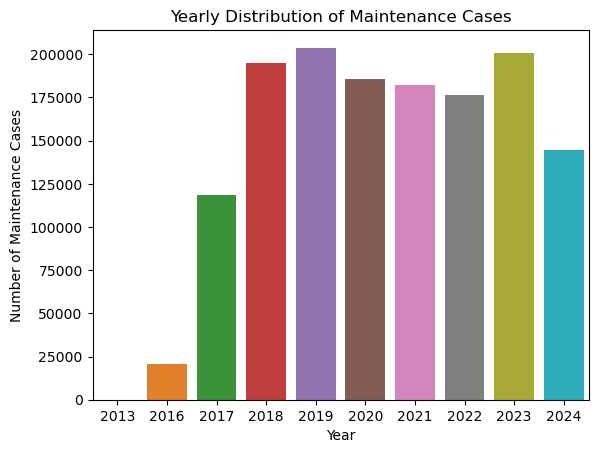

In [163]:
# Plotting the yearly distribution
sns.barplot(x=df['EXECUTION_START_DATE'].dt.year.value_counts().sort_index().index, y=df['EXECUTION_START_DATE'].dt.year.value_counts().sort_index())
plt.title('Yearly Distribution of Maintenance Cases')
plt.xlabel('Year')
plt.ylabel('Number of Maintenance Cases')

From 2016 to 2024, recorded maintenance tasks generally increased, peaking in 2019 at 203,767 tasks, though significant drops occurred in 2020, 2021, and 2022 likely due to operational challenges from the COVID-19 pandemic and aftermath. The peak may reflect heightened production demand, while subsequent declines suggest temporary slowdowns. Despite these fluctuations, the overall trend indicates improved maintenance reporting practices and a shift toward a proactive maintenance culture focused on routine documentation. Thus, the variability in recorded tasks underscores the impact of production demands, operational challenges, and reporting improvements.

In [126]:
# Monthly distribution
df['EXECUTION_START_DATE'].dt.month.value_counts().sort_index()

EXECUTION_START_DATE
1     116461
2     111715
3     123577
4     119116
5     126257
6     124373
7     120954
8     135921
9     113087
10    118229
11    109989
12    107585
Name: count, dtype: int64

Text(0, 0.5, 'Number of Maintenance Cases')

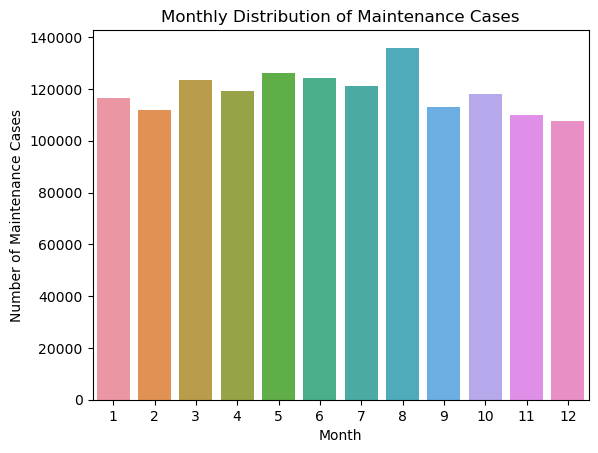

In [164]:
# Plotting the monthly distribution
sns.barplot(x=df['EXECUTION_START_DATE'].dt.month.value_counts().sort_index().index, y=df['EXECUTION_START_DATE'].dt.month.value_counts().sort_index())
plt.title('Monthly Distribution of Maintenance Cases')
plt.xlabel('Month')
plt.ylabel('Number of Maintenance Cases')

The maintenance data shows peaks in August (135,921), May (126,257), and June (124,373), indicating that increased production cycles in late spring and summer contribute to higher maintenance activity due to greater operational stress on machinery. While March (123,577) and April (119,116) also show notable counts, they fall short of summer levels. This suggests a seasonal trend in maintenance demands that merits further exploration of underlying factors such as production levels and equipment performance.

In [128]:
# Weekly distribution
df['EXECUTION_START_DATE'].dt.day_of_week.value_counts().sort_index()

EXECUTION_START_DATE
0    222175
1    265447
2    269498
3    261617
4    241928
5     95907
6     70692
Name: count, dtype: int64

Text(0, 0.5, 'Number of Maintenance Cases')

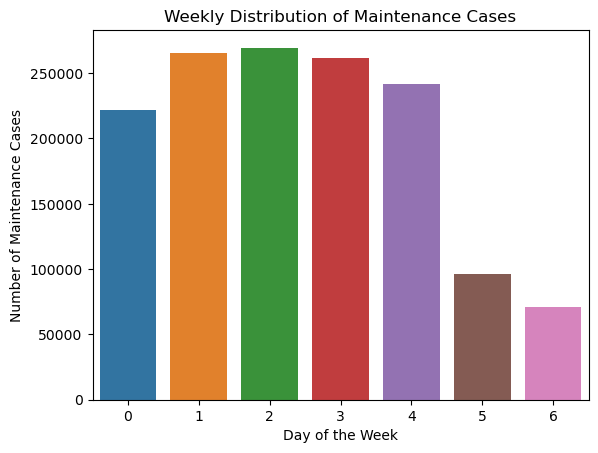

In [165]:
# Plotting the weekly distribution
sns.barplot(x=df['EXECUTION_START_DATE'].dt.day_of_week.value_counts().sort_index().index, y=df['EXECUTION_START_DATE'].dt.day_of_week.value_counts().sort_index())
plt.title('Weekly Distribution of Maintenance Cases')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Maintenance Cases')

Tuesdays(1) and Wednesdays(2) show the highest number of issues, while weekends see a significant drop in maintenance activities. This pattern may suggest that most maintenance occurs during the workweek, potentially due to limited staffing or reduced attention to equipment over the weekends, allowing issues to accumulate and be addressed only on weekdays.

### Production Location (Plant) Distribution <a id = 'scrollTo=denH1qpmdnQH'></a>

In [130]:
# Production Location distribution
df['PRODUCTION_LOCATION'].value_counts()

PRODUCTION_LOCATION
SILVERSTONE    630903
SUZUKA         290975
MONZA          225279
COTA           116303
MONACO          84694
ROMA            79110
Name: count, dtype: int64

In [131]:
# Production Location proportion
df['PRODUCTION_LOCATION'].value_counts()/len(df)*100

PRODUCTION_LOCATION
SILVERSTONE    44.203665
SUZUKA         20.386908
MONZA          15.783975
COTA            8.148668
MONACO          5.934011
ROMA            5.542773
Name: count, dtype: float64

Text(0, 0.5, 'Number of Maintenance Cases')

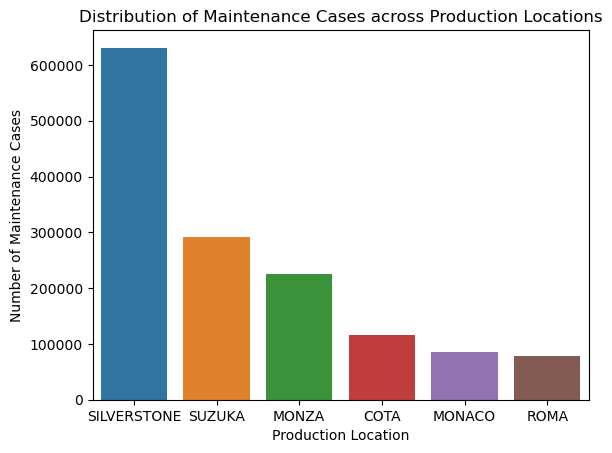

In [167]:
# Plotting the Production Location proportion
sns.barplot(x=df['PRODUCTION_LOCATION'].value_counts().index, y=df['PRODUCTION_LOCATION'].value_counts())
plt.title('Distribution of Maintenance Cases across Production Locations')
plt.xlabel('Production Location')
plt.ylabel('Number of Maintenance Cases')

Silverstone accounts for 44.2% of the total maintenance tasks, followed by Suzuka and Monza. This indicates that Silverstone experiences the highest number of issues among all plants. The high maintenance volume at Silverstone may suggest either higher production demands or older machinery, making it more susceptible to frequent breakdowns. Addressing these issues could involve targeted maintenance strategies or machinery upgrades to minimize downtime and improve efficiency.

### Actual work time in minutes <a id = 'scrollTo=vS__isyWeJGi'></a>

In [133]:
# Actual working time distribution
df['ACTUAL_WORK_IN_MINUTES'].describe()

count    1.427264e+06
mean     8.862968e+01
std      8.037915e+02
min      0.000000e+00
25%      1.200000e+01
50%      4.800000e+01
75%      9.000000e+01
max      3.301848e+05
Name: ACTUAL_WORK_IN_MINUTES, dtype: float64

In [134]:
print(f"Minimum: {df['ACTUAL_WORK_IN_MINUTES'].min()}")
print(f"Medium: {df['ACTUAL_WORK_IN_MINUTES'].median()}")
print(f"Average: {df['ACTUAL_WORK_IN_MINUTES'].mean()}")
print(f"Maximum: {df['ACTUAL_WORK_IN_MINUTES'].max()}")

Minimum: 0.0
Medium: 48.0
Average: 88.62968378660146
Maximum: 330184.8


Text(0, 0.5, 'Frequency')

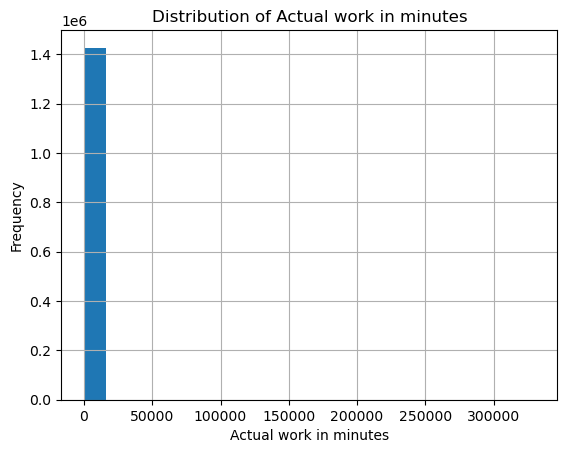

In [168]:
# Histogram for Actual work in minutes
df['ACTUAL_WORK_IN_MINUTES'].hist(bins=20)
plt.title('Distribution of Actual work in minutes')
plt.xlabel('Actual work in minutes')
plt.ylabel('Frequency')

The actual work time distribution is skewed, with the median at 48 minutes indicating that most maintenance tasks are completed relatively quickly. However, the average is much higher at 88.63 minutes, suggesting that a small number of very long tasks are pulling the mean upward. The histogram confirms this skew, as most tasks cluster around shorter durations, while a few outliers with extreme values significantly impact the average, making the median a better measure of typical work time.

In [136]:
# Actual work in minutes(Median) across production location
df['ACTUAL_WORK_IN_MINUTES'].groupby(df['PRODUCTION_LOCATION']).median().sort_values(ascending=False)

PRODUCTION_LOCATION
SUZUKA         60.0
SILVERSTONE    54.0
MONZA          44.0
COTA           31.2
ROMA           18.0
MONACO          3.6
Name: ACTUAL_WORK_IN_MINUTES, dtype: float64

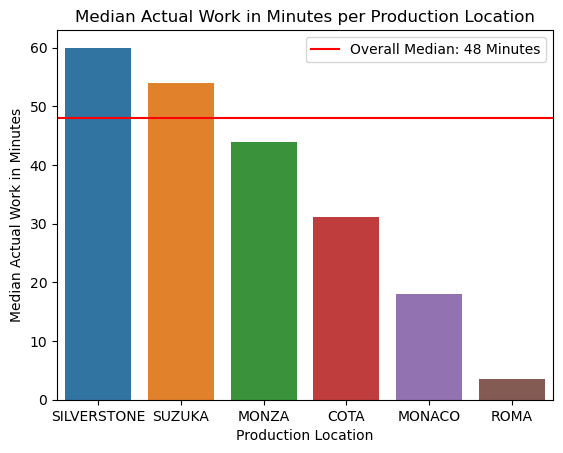

In [173]:
# Plotting actual work in minutes (median) per Production Location
sns.barplot(x=df['PRODUCTION_LOCATION'].value_counts().index, y=df['ACTUAL_WORK_IN_MINUTES'].groupby(df['PRODUCTION_LOCATION']).median().sort_values(ascending=False))
plt.axhline(y=48, color='r', label='Median: 48 Minutes')
plt.title('Actual Work in Minutes(Median) per Production Location')
plt.xlabel('Production Location')
plt.ylabel('Actual Work in Minutes (Median)')
plt.legend(loc='upper right')

The bar plot illustrates the median actual work time for maintenance tasks across different production locations. Suzuka and Silverstone plants experience the longest median repair times, both exceeding the 48-minute median benchmark (marked by the red line). Monza also faces relatively longer repair durations, while Cota, Monaco, and Roma see significantly shorter times, particularly Monaco and Roma, which have very low median repair durations. This suggests that the complexity or scale of issues may differ substantially between locations.

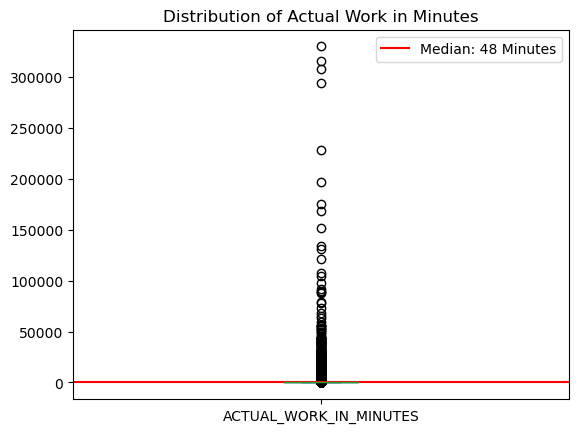

In [178]:
# Box plot
df['ACTUAL_WORK_IN_MINUTES'].plot(kind='box')
plt.axhline(y=48, color='r', label='Median: 48 Minutes')
plt.title("Distribution of Actual Work in Minutes")
plt.legend()

The box plot visualizes the distribution of actual work time in minutes for maintenance tasks. The red horizontal line represents the median of 48 minutes. The plot reveals a heavy presence of outliers, with some tasks taking significantly longer — 330,000 minutes. Most tasks, however, fall within a much smaller range, as indicated by the clustering near the bottom. These extreme outliers dramatically skew the data, causing the mean work time to be much higher than the median.

In [139]:
df['ACTUAL_WORK_IN_MINUTES'].groupby(df['PRODUCTION_LOCATION']).describe()

,count,mean,std,min,25%,50%,75%,max
PRODUCTION_LOCATION,,,,,,,,
COTA,116303.0,60.720869,108.688678,0.0,0.0,31.2,72.0,10219.2
MONACO,84694.0,65.742548,251.565982,0.0,0.0,3.6,60.0,17241.0
MONZA,225279.0,94.765588,872.696258,0.0,6.0,44.0,88.0,330184.8
ROMA,79110.0,50.140030,143.771203,0.0,0.0,18.0,60.0,13200.0
SILVERSTONE,630903.0,94.086904,1039.848074,0.0,15.0,54.0,92.0,315747.6
SUZUKA,290975.0,100.328048,452.896950,0.0,24.0,60.0,112.0,197230.8


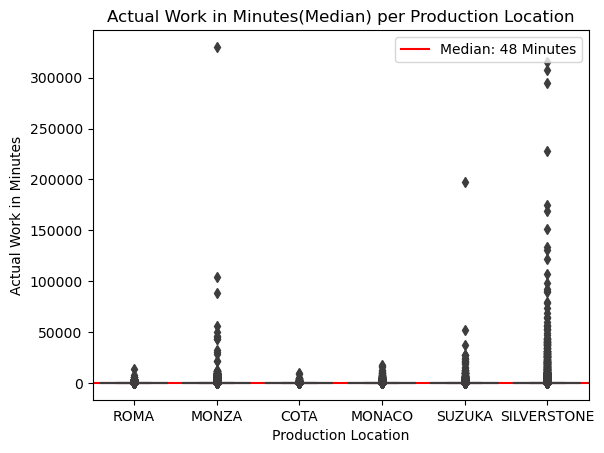

In [179]:
# Plotting the boxplot of Actual work in minutes as explained my production location
sns.boxplot(x=df['PRODUCTION_LOCATION'], y=df['ACTUAL_WORK_IN_MINUTES'])
plt.axhline(y=48, color='r', label='Median: 48 Minutes')
plt.title('Actual Work in Minutes(Median) per Production Location')
plt.xlabel('Production Location')
plt.ylabel('Actual Work in Minutes')
plt.legend(loc='upper right')

This box plot illustrates the distribution of actual work times across various production locations, with the red line marking the median work time of 48 minutes. While the majority of maintenance tasks are completed within a shorter time, the plot highlights significant outliers, particularly in locations like Silverstone, Suzuka, and Monza, where some tasks take an extraordinary amount of time. These outliers significantly skew the data, pushing the mean work time much higher than the median.

### Maintainance Activity Type (Planned vs Unplanned) <a id = 'scrollTo=uqX0V4kyf3sq'></a>


In [141]:
# Planned vs Unplanned maintainance proportion comparison
df['MAINTENANCE_ACTIVITY_TYPE'].value_counts()/len(df)*100

MAINTENANCE_ACTIVITY_TYPE
Unplanned    89.463267
Planned      10.536733
Name: count, dtype: float64

Nearly 90% of maintenance tasks are unplanned, while only about 10% are planned. This high proportion of unplanned tasks reflects a largely reactive approach to maintenance, which often results in higher costs and longer downtimes.

In [142]:
# Planned vs Unplanned maintainance Actaul workimg time comparison (Mean)
df.groupby('MAINTENANCE_ACTIVITY_TYPE')['ACTUAL_WORK_IN_MINUTES'].mean()

MAINTENANCE_ACTIVITY_TYPE
Planned      48.034311
Unplanned    93.410893
Name: ACTUAL_WORK_IN_MINUTES, dtype: float64

In [143]:
# Planned vs Unplanned maintainance Actaul workimg time comparison (Median)
df.groupby('MAINTENANCE_ACTIVITY_TYPE')['ACTUAL_WORK_IN_MINUTES'].median()

MAINTENANCE_ACTIVITY_TYPE
Planned      30.0
Unplanned    52.0
Name: ACTUAL_WORK_IN_MINUTES, dtype: float64

Unplanned maintenance takes approximately twice as long as planned tasks, with a mean time of approx. 94 minutes compared to 48 minutes for planned tasks. The median values also reflect this trend, with unplanned tasks taking 52 minutes compared to 30 minutes for planned ones. This discrepancy underscores the importance of preventive maintenance strategies to mitigate time lost to unforeseen breakdowns.

### Fuctional Location Code Frequency <a id = 'scrollTo=hAPRIj8olJC8'></a>

Location Code consists of 5 different components.

plant – process – sub process – product line – machine

Location Code is broken into FUNCTIONAL_AREA_NODEs to better identify which components is causing the issue.

In [144]:
#  Location-Code: plant – process – sub process – product line – machine
func_loc = []

for i in df['FUCTIONAL_LOC_SPLIT'].tolist():
  # Check if 'i' is iterable before extending
  if isinstance(i, (list, tuple)):
    func_loc.extend(i)
  # If 'i' is not iterable and not NaN, append it as a single element
  elif i is not np.nan:
    func_loc.append(i)

func_loc = pd.Series(func_loc)
func_loc.value_counts().nlargest(10)

PRD     288793
L30     132272
L15     103531
G816     70188
L02      66760
L01      63482
G261     62625
G291     58343
L03      47422
L080     46355
Name: count, dtype: int64

In [145]:
(func_loc.value_counts()/ (len(df) * (1 - .79556550)) * 100).nlargest(10)

PRD     98.975604
L30     45.332474
L15     35.482312
G816    24.054945
L02     22.880095
L01     21.756654
G261    21.462941
G291    19.995407
L03     16.252545
L080    15.886861
Name: count, dtype: float64

In [146]:
def func_area_code_explore(df = df, code = '', sample = 50):
  df.loc[df['FUNCTIONAL_LOC'].str.contains(code, na=False), df.columns[df.columns.str.contains('FUNCTIONAL_AREA')]].sample(sample)

In [147]:
# L30 = Bottle Line
df.loc[df['FUNCTIONAL_LOC'].str.contains('L30', na=False), df.columns[df.columns.str.contains('FUNCTIONAL')]].sample(10)

,FUNCTIONAL_LOC,FUNCTIONAL_AREA_NODE_1_MODIFIED,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,B_FUNCTIONAL_DURATION
1108757,G816-PRD-L30-L04-L030,COTA PRODUCTION,BOTTLE LINE,LINE #4 - BOTTLE_LINE_PET,CONVEYOR,NaN,NaT
1067030,G291-PRD-L30-L02-L080,MONZA PRODUCTION,BTL_PET_LINE,LINE #2 - FILLER_ROT_BTL_PET,FILLER,NaN,0 days
1380878,G291-PRD-L30-L01-L010,MONZA PRODUCTION,BTL_PET_LINE,LINE #1 - FILLER_ROT_BTL_PET,CAPPER,NaN,0 days
1243021,G261-PRD-L30-L01-S180,SILVERSTONE PRODUCTION,"LINES 1,2,9 - BOTTLE LINES",LINE #1 - ROT_BTL_PET,MIXER/BLENZER,NaN,NaT
975258,G812-PRD-L30-L02-L080,PRODUCTION,G812 PRD FILLER_ROT_BTL_PET,G812 PRD FILLER_ROT_BTL_PET LINE 2,FILLER,NaN,NaT
1336784,G291-PRD-L30-L03-L100,MONZA PRODUCTION,BTL_PET_LINE,LINE #3 - FILLER_ROT_BTL_PET,LABELER,NaN,10 days
796472,G221-PRD-L30-L01-L080,SUZUKA PRODUCTION,"L1, L2, L6 PET BOTTLE LINES",LINE #1 - FILLER_ROT_BTL_PET,FILLER,NaN,NaT
623267,G811-PRD-L30-L03-L120,PRODUCTION,"LINE 2,3 PET BOTTLE LINES",LINE 3 SMALL PET,PACKER,NaN,NaT
934527,G291-PRD-L30-L01-L080,MONZA PRODUCTION,BTL_PET_LINE,LINE #1 - FILLER_ROT_BTL_PET,FILLER,NaN,0 days
792590,G816-PRD-L30-L04-L130,COTA PRODUCTION,BOTTLE LINE,LINE #4 - BOTTLE_LINE_PET,PALLETIZER,NaN,NaT


In [148]:
# L15 = Can Line
df.loc[df['FUNCTIONAL_LOC'].str.contains('L15', na=False), df.columns[df.columns.str.contains('FUNCTIONAL')]].sample(10)

,FUNCTIONAL_LOC,FUNCTIONAL_AREA_NODE_1_MODIFIED,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,B_FUNCTIONAL_DURATION
626951,G291-PRD-L15-L04-L120,MONZA PRODUCTION,ROTARY_CAN_LINE,LINE #4-FILLER_ROTARY_CAN,PACKER,NaN,2423 days
6025,G816-PRD-L15-L01-L120,COTA PRODUCTION,CAN LINE,LINE #1-CAN_LINE,PACKER,NaN,2 days
578505,G816-PRD-L15-L01-L030,COTA PRODUCTION,CAN LINE,LINE #1-CAN_LINE,CONVEYOR,NaN,NaT
1065566,G812-PRD-L15-L03-L080,PRODUCTION,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,FILLER,NaN,-78 days
711209,G261-PRD-L15-L04-L070,SILVERSTONE PRODUCTION,"LINES 3,4,10 - CAN LINES",LINE #4-FILLER_ROTARY_CAN,"DETECTOR, PRODUCT",NaN,NaT
844685,G812-PRD-L15-L03-L060,PRODUCTION,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,DEPALLETIZER,NaN,-76 days
1285572,G816-PRD-L15-L03-L020,COTA PRODUCTION,CAN LINE,LINE #3-CAN_LINE,CODER,NaN,NaT
749965,G221-PRD-L15-L04-L080,SUZUKA PRODUCTION,L4 - FILLER_ROTARY_CAN,LINE #4-FILLER_ROTARY_CAN,FILLER,NaN,NaT
839093,G261-PRD-L15-L03-L030,SILVERSTONE PRODUCTION,"LINES 3,4,10 - CAN LINES",LINE #3-FILLER_ROTARY_CAN,CONVEYOR,NaN,NaT
577257,G261-PRD-L15-L03-L060,SILVERSTONE PRODUCTION,"LINES 3,4,10 - CAN LINES",LINE #3-FILLER_ROTARY_CAN,DEPALLETIZER,NaN,NaT


In [149]:
# G816 = COTA Production
df.loc[df['FUNCTIONAL_LOC'].str.contains('G816', na=False), df.columns[df.columns.str.contains('FUNCTIONAL')]].sample(10)

,FUNCTIONAL_LOC,FUNCTIONAL_AREA_NODE_1_MODIFIED,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,B_FUNCTIONAL_DURATION
1334262,G816-PRD-L30-L02-L080,COTA PRODUCTION,BOTTLE LINE,LINE #2 - BOTTLE_LINE_PET,FILLER,NaN,NaT
712100,G816-PRD-L30-L02-L030,COTA PRODUCTION,BOTTLE LINE,LINE #2 - BOTTLE_LINE_PET,CONVEYOR,NaN,NaT
1106364,G816-PRD-P05,COTA PRODUCTION,AIR SYSTEMS,NaN,NaN,NaN,NaT
1199654,G816-PRD-L15-L01-L060,COTA PRODUCTION,CAN LINE,LINE #1-CAN_LINE,DEPALLETIZER,NaN,NaT
1016343,G816-PRD,COTA PRODUCTION,NaN,NaN,NaN,NaN,NaT
44581,G816-PRD-L15-L03-L150,COTA PRODUCTION,CAN LINE,LINE #3-CAN_LINE,"SEAMER, ROTARY",NaN,NaT
841002,G816-PRD-P40-XXX-S020,COTA PRODUCTION,HEATING SYSTEMS,HEATING SYSTEMS,BOILER,NaN,NaT
792512,G816-PRD-L15-L03-L130,COTA PRODUCTION,CAN LINE,LINE #3-CAN_LINE,PALLETIZER,NaN,NaT
1108676,G816-PRD-L30-L02-L120,COTA PRODUCTION,BOTTLE LINE,LINE #2 - BOTTLE_LINE_PET,PACKER,NaN,NaT
223659,G816-PRD-L30-L02-L140,COTA PRODUCTION,BOTTLE LINE,LINE #2 - BOTTLE_LINE_PET,RINSER,NaN,NaT


In [150]:
# L01 = Line #1
df.loc[df['FUNCTIONAL_LOC'].str.contains('L01', na=False), df.columns[df.columns.str.contains('FUNCTIONAL')]].sample(10)

,FUNCTIONAL_LOC,FUNCTIONAL_AREA_NODE_1_MODIFIED,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,B_FUNCTIONAL_DURATION
885095,G261-PRD-L30-L02-L010,SILVERSTONE PRODUCTION,"LINES 1,2,9 - BOTTLE LINES",LINE #2 - ROT_BTL_PET,CAPPER,NaN,NaT
317687,G261-PRD-L30-L01-L060,SILVERSTONE PRODUCTION,"LINES 1,2,9 - BOTTLE LINES",LINE #1 - ROT_BTL_PET,DEPALLETIZER,NaN,NaT
916,G816-PRD-L15-L01-L080,COTA PRODUCTION,CAN LINE,LINE #1-CAN_LINE,FILLER,NaN,-4 days
1104137,G261-PRD-L30-L01-L030,SILVERSTONE PRODUCTION,"LINES 1,2,9 - BOTTLE LINES",LINE #1 - ROT_BTL_PET,CONVEYOR,NaN,NaT
274530,G291-PRD-L30-L01-L130,MONZA PRODUCTION,BTL_PET_LINE,LINE #1 - FILLER_ROT_BTL_PET,PALLETIZER,NaN,0 days
929976,G816-PRD-L15-L01-L030,COTA PRODUCTION,CAN LINE,LINE #1-CAN_LINE,CONVEYOR,NaN,NaT
183049,G291-PRD-L30-L01-L030,MONZA PRODUCTION,BTL_PET_LINE,LINE #1 - FILLER_ROT_BTL_PET,CONVEYOR,NaN,0 days
666194,G812-PRD-L15-L01-L070,PRODUCTION,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 1,"DETECTOR, PRODUCT",NaN,NaT
709470,G221-PRD-L30-L01-L020,SUZUKA PRODUCTION,"L1, L2, L6 PET BOTTLE LINES",LINE #1 - FILLER_ROT_BTL_PET,CODER,NaN,NaT
930284,G812-PRD-L15-L01-L080,PRODUCTION,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 1,FILLER,NaN,NaT


In [151]:
# L080 = FILLER
df.loc[df['FUNCTIONAL_LOC'].str.contains('L080', na=False), df.columns[df.columns.str.contains('FUNCTIONAL')]].sample(10)

,FUNCTIONAL_LOC,FUNCTIONAL_AREA_NODE_1_MODIFIED,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,B_FUNCTIONAL_DURATION
272881,G261-PRD-L15-L03-L080,SILVERSTONE PRODUCTION,"LINES 3,4,10 - CAN LINES",LINE #3-FILLER_ROTARY_CAN,FILLER,NaN,NaT
928696,G261-PRD-L15-L04-L080,SILVERSTONE PRODUCTION,"LINES 3,4,10 - CAN LINES",LINE #4-FILLER_ROTARY_CAN,FILLER,NaN,NaT
136207,G812-PRD-L30-L02-L080,PRODUCTION,G812 PRD FILLER_ROT_BTL_PET,G812 PRD FILLER_ROT_BTL_PET LINE 2,FILLER,NaN,NaT
885480,G812-PRD-L15-L01-L080,PRODUCTION,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 1,FILLER,NaN,NaT
537981,G291-PRD-L30-L03-L080,MONZA PRODUCTION,BTL_PET_LINE,LINE #3 - FILLER_ROT_BTL_PET,FILLER,NaN,1888 days
1424575,G811-PRD-L30-L03-L080,PRODUCTION,"LINE 2,3 PET BOTTLE LINES",LINE 3 SMALL PET,FILLER,NaN,NaT
363675,G261-PRD-L30-L02-L080,SILVERSTONE PRODUCTION,"LINES 1,2,9 - BOTTLE LINES",LINE #2 - ROT_BTL_PET,FILLER,NaN,17 days
935047,G291-PRD-L30-L01-L080,MONZA PRODUCTION,BTL_PET_LINE,LINE #1 - FILLER_ROT_BTL_PET,FILLER,NaN,0 days
267770,G221-PRD-L15-L04-L080,SUZUKA PRODUCTION,L4 - FILLER_ROTARY_CAN,LINE #4-FILLER_ROTARY_CAN,FILLER,NaN,NaT
405048,G221-PRD-L30-L02-L080,SUZUKA PRODUCTION,"L1, L2, L6 PET BOTTLE LINES",LINE #2 - FILLER_ROT_BTL_PET,FILLER,NaN,NaT


It highlights the most commonly affected areas topping the list. This helps identify which specific plant regions and equipment are most prone to issues, allowing targeted improvements in those areas. The overwhelming majority of maintenance issues are reactive and take significantly longer to resolve than planned interventions. Additionally, the location code analysis provides further insights into the most vulnerable components within the manufacturing process, helping prioritize maintenance efforts where they are needed most.

### Machine (Functional area node #4) distribution <a id = 'scrollTo=agdhjgah'></a>

In [152]:
df['FUNCTIONAL_AREA_NODE_4_MODIFIED'].value_counts().sort_values(ascending=False).head(10)

FUNCTIONAL_AREA_NODE_4_MODIFIED
FILLER               46322
PACKER               35230
CONVEYOR             34765
LABELER              18945
PALLETIZER           16239
DEPALLETIZER         10850
DETECTOR, PRODUCT     9404
SEAMER, ROTARY        8510
CAPPER                8350
WARMER_COOLER         7686
Name: count, dtype: int64

In [153]:
(df['FUNCTIONAL_AREA_NODE_4_MODIFIED'].value_counts()/len(df['FUNCTIONAL_AREA_NODE_4_MODIFIED'].dropna()) * 100).sort_values(ascending=False).head(10)

FUNCTIONAL_AREA_NODE_4_MODIFIED
FILLER               19.498007
PACKER               14.829126
CONVEYOR             14.633397
LABELER               7.974391
PALLETIZER            6.835373
DEPALLETIZER          4.567017
DETECTOR, PRODUCT     3.958362
SEAMER, ROTARY        3.582057
CAPPER                3.514709
WARMER_COOLER         3.235216
Name: count, dtype: float64

Text(0, 0.5, 'Frequency')

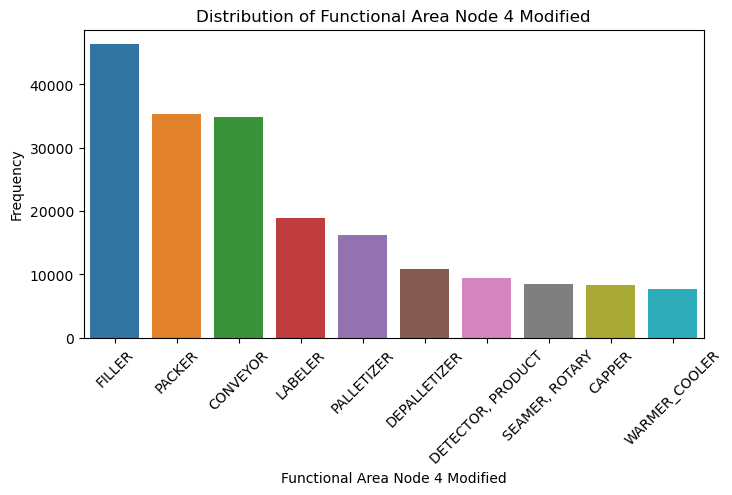

In [193]:
# Plotting the distribution of FUNCTIONAL_AREA_NODE_4_MODIFIED
plt.figure(figsize=(8, 4))
sns.barplot(x=df['FUNCTIONAL_AREA_NODE_4_MODIFIED'].value_counts().sort_values(ascending=False).head(10).index, y=df['FUNCTIONAL_AREA_NODE_4_MODIFIED'].value_counts().sort_values(ascending=False).head(10))
plt.xticks(rotation=45)
plt.title('Distribution of Functional Area Node 4 Modified')
plt.xlabel('Functional Area Node 4 Modified')
plt.ylabel('Frequency')

In [155]:
df.groupby('PRODUCTION_LOCATION')['FUNCTIONAL_AREA_NODE_4_MODIFIED'].value_counts().sort_values(ascending=False).head(10)

PRODUCTION_LOCATION  FUNCTIONAL_AREA_NODE_4_MODIFIED
COTA                 FILLER                             14261
                     CONVEYOR                           11999
SILVERSTONE          FILLER                              9710
MONZA                FILLER                              9049
COTA                 PACKER                              8428
SILVERSTONE          PACKER                              8287
                     CONVEYOR                            8160
MONZA                CONVEYOR                            7724
SUZUKA               PACKER                              6852
                     FILLER                              6269
Name: count, dtype: int64

The chart highlights the most common functional areas where maintenance issues occur, with "FILLER" taking the lead, followed by  "PACKER" and "CONVEYOR". These three components account for the majority of maintenance activities, each contributing significantly to overall downtime. It suggests these components may either experience more wear and tear or are critical points in the production process. This insight could guide efforts to prioritize maintenance strategies, focusing on these areas to minimize disruptions.

### Unplanned maintenance orders <a id = 'scrollTo=R3gHY1NngEl7'></a>

In [156]:
# Unplanned maintainance case per production location distribution
df.loc[df.MAINTENANCE_ACTIVITY_TYPE == 'Unplanned', 'PRODUCTION_LOCATION'].value_counts().sort_values(ascending=False)

PRODUCTION_LOCATION
SILVERSTONE    603094
SUZUKA         272765
MONZA          176621
COTA            89965
MONACO          76544
ROMA            57888
Name: count, dtype: int64

In [157]:
# Unplanned maintainance proportion per production location distribution
df.loc[df.MAINTENANCE_ACTIVITY_TYPE == 'Unplanned', 'PRODUCTION_LOCATION'].value_counts() / df['PRODUCTION_LOCATION'].value_counts()

PRODUCTION_LOCATION
SILVERSTONE    0.955922
SUZUKA         0.937417
MONZA          0.784010
COTA           0.773540
MONACO         0.903771
ROMA           0.731741
Name: count, dtype: float64

In [158]:
# Unplanned maintainance working time per production location distribution
df.loc[df.MAINTENANCE_ACTIVITY_TYPE == 'Unplanned'].groupby('PRODUCTION_LOCATION')['ACTUAL_WORK_IN_MINUTES'].median().sort_values(ascending=False)

PRODUCTION_LOCATION
SUZUKA         63.0
MONZA          55.0
SILVERSTONE    55.0
COTA           30.0
MONACO          0.0
ROMA            0.0
Name: ACTUAL_WORK_IN_MINUTES, dtype: float64

The distribution of unplanned maintenance orders by location reveals that Silverstone leads with the most unplanned maintenance cases (603,094), followed by Suzuka (272,765), and Monza (176,621). In terms of proportion, nearly 96% of maintenance in Silverstone and 94% in Suzuka is unplanned, while other locations like Roma and Monaco have a lower percentage of unplanned tasks. The high percentage of unplanned maintenance in Silverstone and Suzuka suggests these plants might rely more on reactive maintenance strategies. The median repair times in Suzuka (63 minutes) and Silverstone (55 minutes) also reflect the complexity or criticality of their breakdowns.

### Order Description <a id = 'scrollTo=piKhHRxmo5Qq'></a>

In [159]:
df['ORDER_DESCRIPTION']

0          L2 GEARBOX LEAK (SEE ATTACHED)
1            LINE 3 CONVEYOR AT CAN CODER
2                    BROKEN CONVEYOR RAIL
3                         LINE 3 CONVEYOR
4          REPLACED SONIC AIR BLOWER BELT
                        ...              
1427259                            DTRINE
1427260                            DTRINE
1427261                            DTRINE
1427262        FEED ROLLER BAD,  REPLACED
1427263                            WTRINE
Name: ORDER_DESCRIPTION, Length: 1427264, dtype: object

In [160]:
# Most commonly occuring words in the order description
desc_text = df['ORDER_DESCRIPTION'].str.cat(sep=' ')
desc_words = desc_text.split(' ')
pd.Series(desc_words).value_counts().sort_values(ascending = False).head(20)

FOR          74266
WHILE        48313
MECH         39501
SHUTDOWN     24522
LUB          18260
ON           17744
AND          16240
TO           16178
LINE         15645
THE          15478
FILLER       15003
MONTHLY      14684
L1           13769
REPLACED     13402
CAN          12787
CONVEYOR     12765
             12474
L2           12082
PM           11504
OPERATING    10099
Name: count, dtype: int64

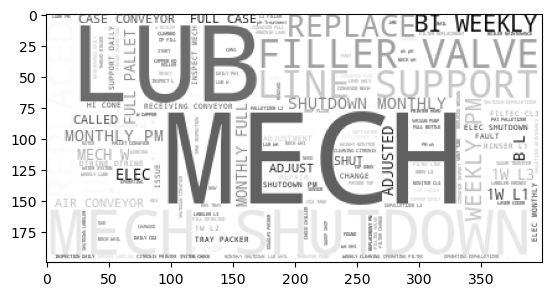

In [161]:
# Word cloud visualizing the above
desc_text = df['ORDER_DESCRIPTION'].str.cat(sep=' ')

wc = WordCloud(background_color='white', colormap = 'binary').generate(desc_text)
plt.imshow(wc)

The word cloud for the Order Description reveals common terms related to maintenance activities. Prominent words like "MECH," "SHUTDOWN," "REPLACED," etc. indicate the frequent nature of mechanical issues and shutdowns that require part replacements. Terms like "CONVEYOR," "FILLER," and specific line identifiers (e.g., "L1," "L2") highlight the equipment and locations most often associated with maintenance orders. It supports the idea that certain areas, such as line maintenance, require more attention and potentially preventive measures

## Summary <a id = 'scrollTo=uEltcAiqmOmB'></a>

- Filler, Packer and Conveyor problems are 3 main causes for trackable maintanence issues, which takes almost 50% of 237,573 cases.
<br></br>
- August recorded the highest maintenance activity with 135,921 cases, followed by May (126,257) and June (124,373). This surge in summer, along with holiday periods, indicates machines are under stress during peak production seasons. Managing equipment load during these periods can reduce wear and tear.
<br></br>
- Maintenance issues decline significantly over the weekend, with Saturday and Sunday reporting the lowest activities at 95,907 and 70,692 respectively.This trend may be attributed to lower production activity or fewer maintenance personnel, causing issues to accumulate and be addressed on weekdays.
<br></br>
- 89.46% of maintenance activities are unplanned, highlighting a reactive approach in addressing equipment failures. Planned maintenance only accounts for 10.54%, emphasizing the need for a shift towards preventive maintenance strategies.
<br></br>
- On average, unplanned tasks take 93.41 minutes, nearly double the time it takes for planned tasks (48.03 minutes). The median repair time also shows a significant difference, with unplanned tasks requiring 52 minutes versus 30 minutes for planned tasks. This suggests that addressing issues reactively leads to longer downtimes.
<br></br>
- Suzuka has the longest median downtime at 60 minutes, followed by Silverstone at 54 minutes. Both plants exceed the 48-minute benchmark (median time across all locations). In contrast, Monaco and Roma have much shorter median downtimes at 3.6 minutes and 18 minutes, respectively, suggesting that machines in these plants might have fewer complex breakdowns or more effective maintenance practices.
<br></br>
- While the median work time is 48 minutes, the average work time is skewed to 88.63 minutes due to extreme outliers. The longest maintenance task recorded took 330,184.8 minutes (around 229 days), indicating that rare but significant disruptions exist. These might be caused by a combination of severe machine breakdowns and delays in procuring replacement parts or equipment, hinting at inventory-related challenges.
<br></br>
- By implementing predictive analytics, the company can proactively detect machine degradation or early signs of failure, allowing for timely intervention. This would reduce the reliance on unplanned maintenance, lowering the average downtime and repair costs while increasing machine uptime.
<br></br>
- Silverstone leads with 603,094 unplanned tasks (approximately 95.6% of its maintenance), followed by Suzuka with 272,765 unplanned tasks (93.7%). Monza has 176,621 unplanned tasks, representing 78.4% of its maintenance activities. Addressing the root causes of unplanned tasks at these locations could reduce the burden on maintenance teams.
<br></br>
- Filler machines alone account for 46,322 cases, representing 19.5% of all maintenance activities, followed by Packer with 35,230 cases (14.8%) and Conveyor with 34,765 cases (14.6%). These areas are clearly the most problematic and could benefit from targeted interventions such as routine inspections, part replacements, or technological upgrades to reduce their frequency of breakdowns. 
<br></br>
- These data-driven insights point to several actionable steps, such as increasing the focus on preventive maintenance, implementing predictive analytics, and prioritizing the most vulnerable machines (Filler, Packer, and Conveyor) to enhance overall operational efficiency and reduce downtime.

## Group Member Contribution <a id = 'scrollTo=gmc'></a>

- **Richard Lim**: Data Cleaning, preprocessing and EDA
- **Anusha Vivekanand**: Refining the Visualization and TOC
- **Ketki Abhay Kulkarni**: Final Report and Result Summary
- **Vedika Garg**: Interpretative comments and Structuring the File